## Plotting CDFs for all basket trap pairs

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance

Defining Functions

In [2]:
# removing outlier GSDs
def remove_outlier_gsd(matrix):
    # calculating representative sizes
    matrix_d16 = np.percentile(matrix, 16, axis=0)
    matrix_d50 = np.percentile(matrix, 50, axis=0)
    matrix_d84 = np.percentile(matrix, 84, axis=0)
    # calculating Quartile 1
    tempCalc1 = np.percentile(matrix_d16, 25)
    tempCalc2 = np.percentile(matrix_d50, 25)
    tempCalc3 = np.percentile(matrix_d84, 25)
    matrix_q1 = np.array((tempCalc1, tempCalc2, tempCalc3)) # d16, d50, d84
    # calculating Quartile 3
    tempCalc1 = np.percentile(matrix_d16, 75)
    tempCalc2 = np.percentile(matrix_d50, 75)
    tempCalc3 = np.percentile(matrix_d84, 75)
    matrix_q3 = np.array((tempCalc1, tempCalc2, tempCalc3)) # d16, d50, d84
    # calculating IQR and lower/upper bounds
    spring_wc_IQR = matrix_q3 - matrix_q1
    lower_bound = matrix_q1 - 1.5*spring_wc_IQR
    upper_bound = matrix_q3 + 1.5*spring_wc_IQR
    # identifying GSDs with representative sizes outside the range
    tempBool1 = np.where(matrix_d16 < lower_bound[0], True, False)
    tempBool2 = np.where(matrix_d50 < lower_bound[1], True, False)
    tempBool3 = np.where(matrix_d84 < lower_bound[2], True, False)
    tempBool1 + tempBool2 + tempBool3
    np.arange(len(tempBool1))[tempBool1 + tempBool2 + tempBool3]
    # identifying GSDs with representative sizes outside the range
    tempBool4 = np.where(matrix_d16 > upper_bound[0], True, False)
    tempBool5 = np.where(matrix_d50 > upper_bound[1], True, False)
    tempBool6 = np.where(matrix_d84 > upper_bound[2], True, False)
    tempBool4 + tempBool5 + tempBool6
    np.arange(len(tempBool4))[tempBool4 + tempBool5 + tempBool6]
    # deleting outlier GSDs
    tempCalc1 = np.arange(len(tempBool1))[tempBool1 + tempBool2 + tempBool3 + tempBool4 + tempBool5 + tempBool6]
    tempCalc2 = np.delete(matrix, tempCalc1, axis=1)
    
    return tempCalc2

Importing Data

In [3]:
# checking environment and working directory
import os
os.getcwd()
working_directory = "C:/Users/huck4481/Documents/GitHub/La_Jara/GSD/trap_CDFs/"
os.chdir(working_directory)

# filenames and directories
results_directory = "./plots/"
filename1 = "./Spring_2023_watercolumn_percentage.csv"
filename2 = "./Spring_2023_basket_percentage.csv"
filename3 = "./Summer_2023_watercolumn_percentage.csv"
filename4 = "./Summer_2023_basket_percentage.csv"

# reading files
dataframe1 = pd.read_csv(filename1)
dataframe2 = pd.read_csv(filename2)
dataframe3 = pd.read_csv(filename3)
dataframe4 = pd.read_csv(filename4)

# getting information
grain_sizes = np.array(dataframe1.iloc[:-1, 0])
proportion1 = np.array(dataframe1.iloc[:-1, 1:]) # spring water column
proportion2 = np.array(dataframe2.iloc[:-1, 1:]) # spring basket
proportion3 = np.array(dataframe3.iloc[:, 1:])   # summer water column
proportion4 = np.array(dataframe4.iloc[:-1, 1:]) # summer basket

Calculations

In [4]:
# calculating cumulative sum
spring_wc_gsd = np.cumsum(proportion1, axis=0)
spring_st_gsd = np.cumsum(proportion2, axis=0)
summer_wc_gsd = np.cumsum(proportion3, axis=0)
summer_st_gsd = np.cumsum(proportion4, axis=0)

# removing outlier GSDs
spring_wc_gsd = remove_outlier_gsd(spring_wc_gsd)
summer_wc_gsd = remove_outlier_gsd(summer_wc_gsd)

# convert to pandas dataframe
spring_wc_gsd = pd.DataFrame(spring_wc_gsd)
spring_st_gsd = pd.DataFrame(spring_st_gsd)
summer_wc_gsd = pd.DataFrame(summer_wc_gsd)
summer_st_gsd = pd.DataFrame(summer_st_gsd)

In [6]:
# column names of dataframes are the same as the ones from dataframe1, 2, 3 and 4
spring_st_gsd.columns = dataframe2.columns[1:]
summer_st_gsd.columns = dataframe4.columns[1:]


In [ ]:
# calculating max, avg and min GSDs
spring_wc_gsd_max = pd.DataFrame(np.max(spring_wc_gsd, axis=1))
spring_wc_gsd_avg = pd.DataFrame(np.mean(spring_wc_gsd, axis=1))
spring_wc_gsd_min = pd.DataFrame(np.min(spring_wc_gsd, axis=1))
summer_wc_gsd_max = pd.DataFrame(np.max(summer_wc_gsd, axis=1))
summer_wc_gsd_avg = pd.DataFrame(np.mean(summer_wc_gsd, axis=1))
summer_wc_gsd_min = pd.DataFrame(np.min(summer_wc_gsd, axis=1))

In [ ]:
# defining open/closed baskets
spring_st = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])
summer_st = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

Plots - Summer

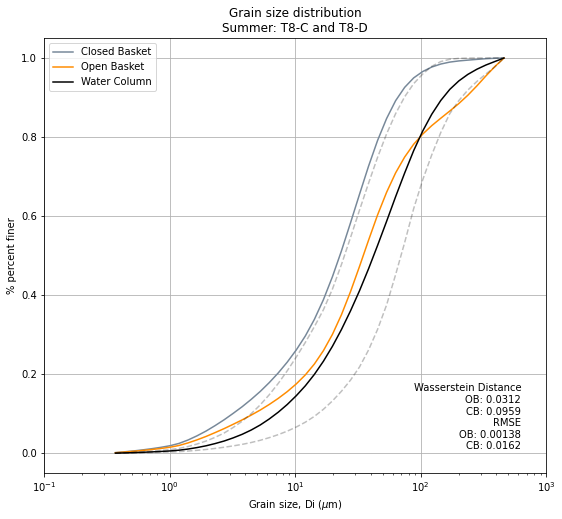

In [5]:
# Plotting SUMMER
plt.rcParams.update({'figure.facecolor':'white'})
color_closed ="lightslategrey"
color_open = "darkorange"
basket_closed = 20
basket_open = 21
tempString1 = "Grain size distribution\nSummer: T8-C and T8-D"
outname = "summer-t8c-t8d"
distance_closed = wasserstein_distance(summer_st_gsd[:, basket_closed], summer_wc_gsd_avg)
distance_open = wasserstein_distance(summer_st_gsd[:, basket_open], summer_wc_gsd_avg)
distance_closed = np.round(distance_closed, 4)
distance_open = np.round(distance_open, 4)
rmse_closed = np.mean((summer_st_gsd[:, basket_closed] - summer_wc_gsd_avg)**2)
rmse_open = np.mean((summer_st_gsd[:, basket_open] - summer_wc_gsd_avg)**2)
rmse_closed = np.round(rmse_closed, 5)
rmse_open = np.round(rmse_open, 5)
plt.figure(figsize=(9, 8))
plt.plot(grain_sizes, summer_st_gsd[:, basket_closed], color=color_closed, label="Closed Basket")
plt.plot(grain_sizes, summer_st_gsd[:, basket_open], color=color_open, label="Open Basket")
plt.plot(grain_sizes, summer_wc_gsd_max, color="black", linestyle="--", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="black", label="Water Column")
plt.plot(grain_sizes, summer_wc_gsd_min, color="black", linestyle="--", alpha=0.25)
tempString2 = "Wasserstein Distance\nOB: "+str(distance_open) +"\nCB: "+str(distance_closed) +\
                "\nRMSE\nOB: "+str(rmse_open) +"\nCB: "+str(rmse_closed)
plt.text(0.95, 0.05, tempString2, fontsize=10,
        horizontalalignment='right', verticalalignment='bottom',
        transform=plt.gca().transAxes)
plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(tempString1)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

Plots - Spring

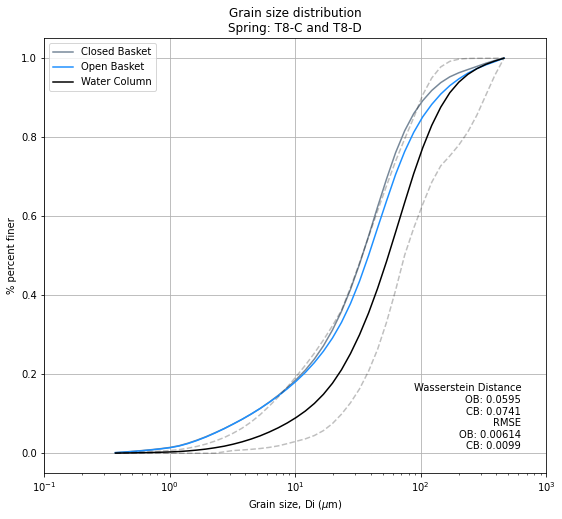

In [6]:
# Plotting SPRING
#colormap2 = cm.get_cmap('Blues', spring_st_gsd.shape[1])
#colors2 = colormap2(np.linspace(0,1, spring_st_gsd.shape[1]))
plt.rcParams.update({'figure.facecolor':'white'})
color_closed ="lightslategrey"
color_open = "dodgerblue"
basket_closed = 21
basket_open = 22
tempString1 = "Grain size distribution\nSpring: T8-C and T8-D"
outname = "spring-t8c-t8d"
distance_closed = wasserstein_distance(spring_st_gsd[:, basket_closed], spring_wc_gsd_avg)
distance_open = wasserstein_distance(spring_st_gsd[:, basket_open], spring_wc_gsd_avg)
distance_closed = np.round(distance_closed, 4)
distance_open = np.round(distance_open, 4)
rmse_closed = np.mean((spring_st_gsd[:, basket_closed] - spring_wc_gsd_avg)**2)
rmse_open = np.mean((spring_st_gsd[:, basket_open] - spring_wc_gsd_avg)**2)
rmse_closed = np.round(rmse_closed, 5)
rmse_open = np.round(rmse_open, 5)
plt.figure(figsize=(9, 8))
plt.plot(grain_sizes, spring_st_gsd[:, basket_closed], color=color_closed, label="Closed Basket")
plt.plot(grain_sizes, spring_st_gsd[:, basket_open], color=color_open, label="Open Basket")
plt.plot(grain_sizes, spring_wc_gsd_max, color="black", linestyle="--", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="black", label="Water Column")
plt.plot(grain_sizes, spring_wc_gsd_min, color="black", linestyle="--", alpha=0.25)
tempString2 = "Wasserstein Distance\nOB: "+str(distance_open) +"\nCB: "+str(distance_closed) +\
                "\nRMSE\nOB: "+str(rmse_open) +"\nCB: "+str(rmse_closed)
plt.text(0.95, 0.05, tempString2, fontsize=10,
        horizontalalignment='right', verticalalignment='bottom',
        transform=plt.gca().transAxes)
plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(tempString1)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

Double Plots